In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Import digits data set from Scikitlearn datasets library
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [20]:
# Creaete the features dataframe
X=data.data
X.shape

(1797, 64)

In [17]:
# Create the dependent variable dataframe
y = data.target
y.shape

(1797,)

In [28]:
# Get the number of images for each number
result = np.bincount(y)
print(f"The Target Contains {len(result)}: elements counts -- {result}" )

The Target Contains 10: elements counts -- [178 182 177 183 181 182 181 179 174 180]


In [33]:
# Create the train/test dataset
XTrain, XTest, yTrain, yTest = train_test_split(X,y,stratify=y,random_state=142)
print("Shape Xtrain/yTrain", XTrain.shape, yTrain.shape)
print("Shape Xtest,yTest", XTest.shape, yTest.shape)

Shape Xtrain/yTrain (1347, 64) (1347,)
Shape Xtest,yTest (450, 64) (450,)


In [41]:
# Normalizing the data
Xtrain_max = np.max(XTrain)
print("The maxinium value of XTrain is ", Xtrain_max)

Xtrain_normalized = Xtrain / Xtrain_max
Xtest_normalized = Xtest / Xtrain_max

The maxinium value of XTrain is  16.0


In [95]:
# Using KneighborClassifier

train_scores = []
test_scores = []
all_neighbors = range(1,10)
for neighbors in all_neighbors:
    k_neighbors = KNeighborsClassifier(n_neighbors=neighbors)
    k_neighbors.fit(Xtrain_normalized, yTrain)

    train_scores.append(k_neighbors.\
                       score(Xtrain_normalized, y_predicted_train))
    test_scores.append(k_neighbors.\
                      score(Xtest_normalized, yTest))

    print("index = ", neighbors)
    print("train score = ", train_scores[neighbors-1])
    print("test  score = ", test_scores[neighbors-1])
    print("-"*50)

index =  1
train score =  0.9888641425389755
test  score =  0.9866666666666667
--------------------------------------------------
index =  2
train score =  0.9881217520415738
test  score =  0.9822222222222222
--------------------------------------------------
index =  3
train score =  0.9925760950259837
test  score =  0.9844444444444445
--------------------------------------------------
index =  4
train score =  0.994060876020787
test  score =  0.9844444444444445
--------------------------------------------------
index =  5
train score =  1.0
test  score =  0.9844444444444445
--------------------------------------------------
index =  6
train score =  0.9948032665181886
test  score =  0.9844444444444445
--------------------------------------------------
index =  7
train score =  0.9933184855233853
test  score =  0.9822222222222222
--------------------------------------------------
index =  8
train score =  0.9925760950259837
test  score =  0.98
-----------------------------------------

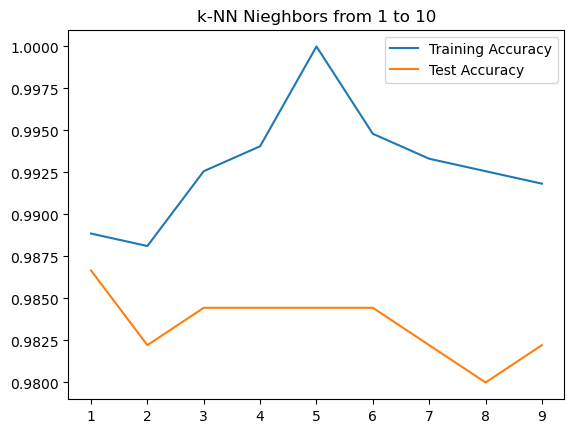

In [101]:
# Generate Plot
plt.title("k-NN Nieghbors from 1 to 10")
plt.plot(all_neighbors, train_scores, label = "Training Accuracy")
plt.plot(all_neighbors, test_scores, label = "Test Accuracy")
plt.legend()
plt.show()

In [114]:
# Need to understand how to optimize
logistic_regression = LogisticRegression(max_iter=190)
logistic_regression.fit(Xtrain_normalized,yTrain)
training_scores = logistic_regression.score(Xtrain_normalized,yTrain)
testing_scores = logistic_regression.score(Xtest_normalized,yTest)
print("train score = ", training_scores)
print("test  score = ", testing_scores)
print("-"*50)

train score =  0.9836674090571641
test  score =  0.9688888888888889
--------------------------------------------------
